In [1]:
!pip freeze

joblib==1.4.2
numpy==2.1.2
scikit-learn==1.5.2
scipy==1.14.1
threadpoolctl==3.5.0


In [2]:
# imports
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import joblib
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import layers, models

In [3]:
# read in data and preprocess
images_path = './data/asl_dataset/'
images = []

for directory in os.listdir(images_path):
    for file in os.listdir(images_path+directory):
        file_path = images_path+directory+'/'+file
        image = Image.open(file_path)
        image = image.convert('L') # convert to grayscale
        image = image.resize((128, 128)) # resize
        # image.save('./data/resized/'+file) # uncomment to save the resized image
        image = np.array(image) # convert to array
        image = image / 255.0 # normalize
        images.append((directory, image))

x = [image[1] for image in images]
y = [image[0] for image in images]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [35]:
x_train = np.array(x_train)
x_test = np.array(x_test)

# binarize the labels
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)
joblib.dump(label_binarizer, './models/label_binarizer1.pkl') # save label binarizer


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_test[0])

(2012, 128, 128)
(2012, 36)
(503, 128, 128)
(503, 36)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [5]:
model = models.Sequential([
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dense(36, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

C:\Users\calif\Desktop\DataMining\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.0631 - loss: 3.4891 - val_accuracy: 0.1365 - val_loss: 3.1665
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.2027 - loss: 2.9537 - val_accuracy: 0.2531 - val_loss: 2.8319
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.3024 - loss: 2.5750 - val_accuracy: 0.2928 - val_loss: 2.6389
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.3338 - loss: 2.3861 - val_accuracy: 0.3151 - val_loss: 2.4441
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.3703 - loss: 2.2118 - val_accuracy: 0.3821 - val_loss: 2.3174
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.4259 - loss: 2.0820 - val_accuracy: 0.4194 - val_loss: 2.1796
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.4592 - loss: 1.9528 - val_accuracy: 0.4764 - val_loss: 2.0508
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.5478 - loss: 1.7119 - val_accuracy: 0.4913 - 

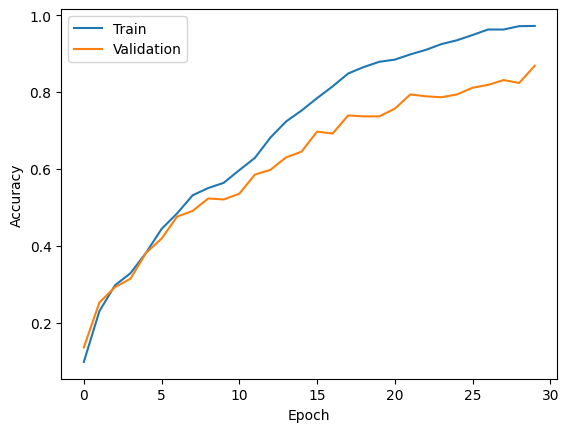

In [6]:
# plot model performance
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

In [7]:
# print results of test data ran through model

test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(test_loss)
print(test_accuracy)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8863 - loss: 0.4586
0.5501701235771179
0.8727633953094482


In [8]:
# save model
model.save('./models/model1.keras')

In [36]:
t = np.expand_dims(x_test[0], axis=0) 
predictions = model.predict(t)
# predicted_class = np.argmax(predictions, axis=1)
print(predictions)
# print(predicted_class.reshape(-1, 1))
# original_label = label_binarizer.inverse_transform(predicted_class)
# original_label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[3.03944248e-08 2.92696097e-14 7.94476952e-13 9.45485111e-15
  3.40769795e-08 6.95319832e-05 5.98691372e-07 6.38514942e-18
  4.59648682e-12 1.25844139e-07 6.67319307e-03 2.18676691e-11
  1.83577117e-06 4.29992338e-17 5.45493400e-16 2.59943704e-07
  1.10511333e-04 2.57112712e-12 2.84700469e-23 4.53551875e-05
  4.75205812e-15 3.28224878e-08 9.06961432e-05 2.03346076e-07
  2.95161638e-11 2.90705102e-05 1.15440386e-08 1.12072495e-13
  6.70359582e-02 9.25942361e-01 1.60670929e-13 1.05064927e-07
  2.80790429e-17 3.81167473e-16 2.92866762e-08 2.28463357e-22]]
